In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Machine learning

Process of training a computer to do something while giving him data and results, and not how to do stuff.

## Category of machine learning

Supervised learning => you give data and the solution  
Unsupervised learning => you give data and no solution  
Reinforced learning => training algorithms get a feedback from environnement (mainly game)

## Predicting Titanic survival : a Simple Logistic Regression

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/Aenori/20221024_public/main/dataset/titanic_train.csv', 
                     index_col=0)

In [12]:
data['Survived'].mean()

0.3838383838383838

In [11]:
data.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [13]:
target = data.Survived.values
data['SexAsInt'] = (data['Sex'] == 'female')

numerical_features = data.get(['Fare', 'Pclass', 'Age', 'SexAsInt'])
median_features = numerical_features.dropna().median()
imputed_features = numerical_features.fillna(median_features)

features_array = imputed_features.values

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)

logreg.coef_

array([[ 5.31149550e-04, -1.05614490e+00, -3.52683892e-02,
         2.45508297e+00]])

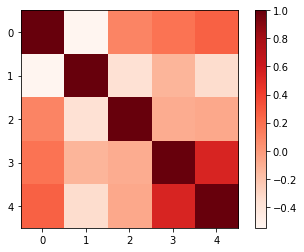

In [17]:
plt.imshow(data.get(['Fare', 'Pclass', 'Age', 'SexAsInt', 'Survived']).corr(), 
           interpolation='nearest', 
           cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

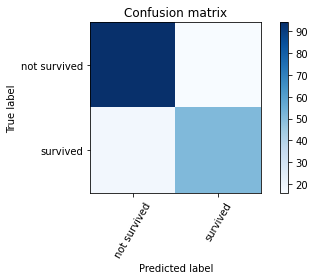

In [14]:
from sklearn.metrics import confusion_matrix

target_predicted = logreg.predict(features_test)

cm = confusion_matrix(target_test, target_predicted)

def plot_confusion(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Blues')
    plt.colorbar()

    target_names = ['not survived', 'survived']

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()
    
plot_confusion(cm)

## Predicting Home Prices: a Simple Linear Regression

Now we'll use scikit-learn to perform a simple linear regression on the housing data. There are many possibilities of regressors to use. A particularly simple one is LinearRegression: this is basically a wrapper around an ordinary least squares calculation.

We'll set it up like this:

Text(0, 0.5, 'Predicted price ($1000s)')

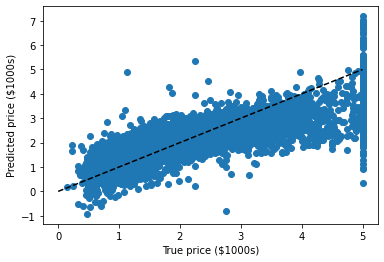

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

clf = LinearRegression()

clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.scatter(expected, predicted)
plt.plot([0, 5], [0, 5], '--k')

plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

In [6]:
print(data['feature_names'])
print(clf.coef_)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[ 4.38190814e-01  9.51148209e-03 -1.05068256e-01  5.93315297e-01
 -2.26433872e-06 -3.37312170e-03 -4.10427769e-01 -4.23239259e-01]
